In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
import seaborn as sns
import math

In [150]:
"Assignment- 4 - Task-5"

'Assignment- 4 - Task-5'

In [151]:
x1 = [1,2,2,0,1,0]
x2 = [1,2,0,0,0,1]
cls = ['+','+','+','-','-','-']

In [152]:
dict = {"class":cls,"x1":x1,"x2":x2}

In [153]:
df = pd.DataFrame(dict)

In [154]:
df

,class,x1,x2
0,+,1,1
1,+,2,2
2,+,2,0
3,-,0,0
4,-,1,0
5,-,0,1


In [155]:
datapoints = df[['x1','x2']].values
y = df['class'].values

In [156]:
datapoints

array([[1, 1],
       [2, 2],
       [2, 0],
       [0, 0],
       [1, 0],
       [0, 1]], dtype=int64)

In [157]:
y

array(['+', '+', '+', '-', '-', '-'], dtype=object)

C:\Users\rakes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


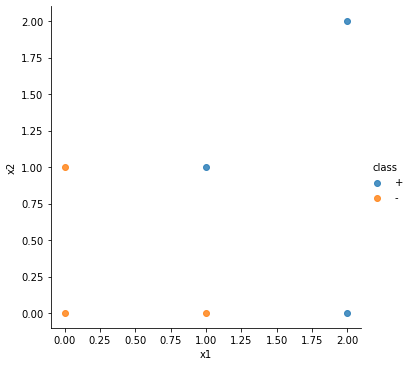

In [158]:
sns.lmplot('x1','x2',data = df, hue='class',fit_reg = False);

In [159]:
C = [1.0,2.0,3.0]

Weight(W)=  [-1.2 -0.4]
Bias(b)= 1.4
Support Vectors =  [[1. 1.]
 [2. 0.]
 [1. 0.]
 [0. 1.]]
Plane Slope = -3.0000000000000004
MaxMargin =  1.5811388300841893
Weight(W)=  [-1.6 -1.2]
Bias(b)= 2.2
Support Vectors =  [[1. 1.]
 [2. 0.]
 [1. 0.]
 [0. 1.]]
Plane Slope = -1.3333333333333335
MaxMargin =  1.0


C:\Users\rakes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rakes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Weight(W)=  [-1.99909331 -1.99818661]
Bias(b)= 2.9978843798156767
Support Vectors =  [[1. 1.]
 [2. 0.]
 [1. 0.]
 [0. 1.]]
Plane Slope = -1.0004537586027236
MaxMargin =  0.7075879374925155


C:\Users\rakes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


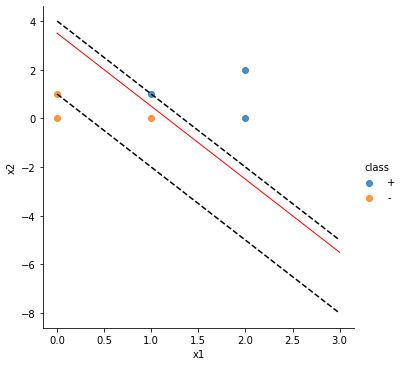

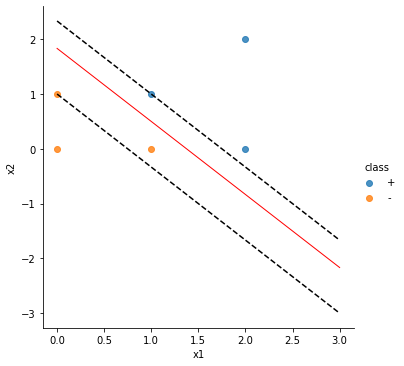

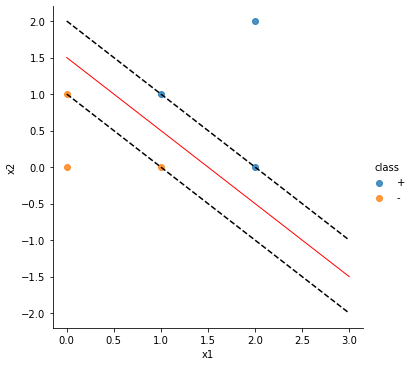

In [160]:
for j in C:
    Model = svm.SVC(C = j, kernel = 'linear')
    Model.fit(datapoints,y)
    W = Model.coef_[0]
    slope = -W[0]/W[1]
    b = Model.intercept_[0]
    print("Weight(W)= ", W)
    print("Bias(b)=", b)
    print("Support Vectors = ",Model.support_vectors_)
    print("Plane Slope =", slope)
    X = np.linspace(0,3)
    Y = slope* X - (b/W[1])
    # print("hyperPlane - ", Y)
    s1 = Model.support_vectors_[0]
    Y_down = slope* X + (s1[1] - slope*s1[0])
    # print("LowerBound - ", Y_down)
    s2 = Model.support_vectors_[3]
    Y_up = slope* X + (s2[1] - slope*s2[0])
    # print("UpperBound - ", Y_up)
    sum = 0
    for i in W:
        sum = sum + i*i;
    w = math.sqrt(sum)
    Max_Margin = 2 / w;
    print("MaxMargin = ", Max_Margin)
    sns.lmplot('x1','x2',data = df, hue='class',fit_reg = False);
    plt.plot(X,Y, linewidth = 1, color = 'red')
    plt.plot(X,Y_down, 'k--')
    plt.plot(X,Y_up,'k--')

In [161]:
"Task-6"

'Task-6'

In [162]:
x = [0,-1,1]
y = [0,0,0]
cls = ['+','-','-']
dict = {"class":cls,"x":x, "y": y}
df2 = pd.DataFrame(dict)
df2

,class,x,y
0,+,0,0
1,-,-1,0
2,-,1,0


C:\Users\rakes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


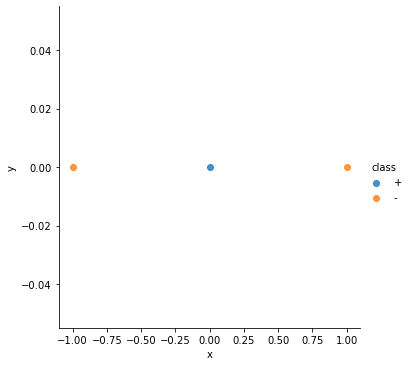

In [163]:
sns.lmplot('x','y',data = df2, hue='class',fit_reg = False);

In [164]:
# datapoints for 3D feature space
datapoints = np.array([[1,0,0],[1,-1.414,1],[1,1.414,1]])
Y = np.array(['+','-','-']) 
model = svm.SVC(kernel = 'linear', C =2)
model.fit(datapoints,Y)

SVC(C=2, kernel='linear')

In [165]:
model.intercept_[0]

-0.9993996926177396

In [166]:
model.coef_[0]

array([ 0.00000000e+00, -1.36546594e-11,  1.99909945e+00])

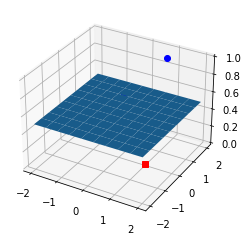

In [167]:
z = lambda x,y:(-model.intercept_[0]-model.coef_[0][0]*x-model.coef_[0][1]*y)/model.coef_[0][2]
temp = np.linspace(-2,2,10)
x,y = np.meshgrid(temp,temp)
fig = plt.figure()
afig = fig.add_subplot(projection = '3d')
afig.plot_surface(x,y, z(x,y))
afig.plot3D(datapoints[Y == '-',0], datapoints[Y == '-',1], datapoints[Y == '-',2],'ob')
afig.plot3D(datapoints[Y == '+',0], datapoints[Y == '+',1], datapoints[Y == '+',2],'sr')

               
plt.show()